# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。

不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

# 3 - 数据预览与预处理
<br>

在拿到数据第一步当然是对数据做一个大概的浏览，以及对缺失值重复值进行相关处理。

本小节就将练习这部分的基本操作。

注意1：为了尽可能多的介绍不同方法，因此本节部分操作不是必须的。

注意2:当进入到 pandas 操作数据时，很多答案并非唯一也并非最优。
 

## 初始化

<br>

该 `Notebook` 版本为**纯习题版**

如果需要答案或者提示，可以微信搜索公众号「早起Python」获取！

## 加载数据

In [1]:
import pandas as pd
df = pd.read_excel("TOP250.xlsx")

## 数据查看

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   片名      262 non-null    object 
 1   上映年份    262 non-null    int64  
 2   评分      257 non-null    float64
 3   评价人数    259 non-null    float64
 4   导演      262 non-null    object 
 5   编剧      262 non-null    object 
 6   主演      262 non-null    object 
 7   类型      262 non-null    object 
 8   国家/地区   256 non-null    object 
 9   语言      256 non-null    object 
 10  时长(分钟)  256 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 22.6+ KB


### 1 - 查看数据维度

先看看数据多少行，多少列，对接下来的处理量心里有个数

In [2]:
#df.shape
len(df.columns)

11

In [3]:
len(df)

262

### 2 - 随机查看5条数据

In [5]:
df.sample(5)

片名  上映年份   评分      评价人数               导演                    编剧  \
157    哪吒闹海  1979  9.1  202556.0  严定宪 / 王树忱 / 徐景达                   王树忱   
120      功夫  2004  8.7  816184.0              周星驰  曾瑾昌 / 陈文强 / 周星驰 / 霍昕   
182    记忆碎片  2000  8.6  499479.0         克里斯托弗·诺兰     克里斯托弗·诺兰 / 乔纳森·诺兰   
7    辛德勒的名单  1993  9.5  890468.0        史蒂文·斯皮尔伯格     托马斯·肯尼利 / 斯蒂文·泽里安   
95     勇敢的心  1995  8.9  484179.0           梅尔·吉布森               兰道尔·华莱士   

                                                    主演  \
157                     梁正晖 / 邱岳峰 / 毕克 / 富润生 / 尚华 / 于鼎   
120  周星驰 / 元秋 / 元华 / 黄圣依 / 梁小龙 / 陈国坤 / 田启文 / 林子聪 / ...   
182  盖·皮尔斯 / 凯瑞-安·莫斯 / 乔·潘托里亚诺 / 小马克·布恩 / 拉什·费加 / 乔...   
7    连姆·尼森 / 本·金斯利 / 拉尔夫·费因斯 / 卡罗琳·古多尔 / 乔纳森·萨加尔 / ...   
95   梅尔·吉布森 / 苏菲·玛索 / 布莱恩·考克斯 / 詹姆斯·科兹莫 / 辛·劳洛 / 凯瑟...   

                         类型 国家/地区     语言  时长(分钟)  
157            动画 / 奇幻 / 冒险    中国  汉语普通话    65.0  
120       喜剧 / 动作 / 犯罪 / 奇幻    中国    粤语    100.0  
182       剧情 / 悬疑 / 惊悚 / 犯罪    美国     英语   113.0  
7              剧情 / 历史 / 战争    美国    英语    195.0  
95   剧情 / 动作 / 传记 / 历史 / 战争    美国    英语    178.0

In [4]:
import numpy as np

### 3 - 查看数据前后5行

In [5]:
df.iloc[np.r_[0:5,-5:0]]

片名  上映年份   评分       评价人数        导演  \
0      肖申克的救赎  1994  9.7  2317937.0  弗兰克·德拉邦特   
1        霸王别姬  1993  9.6  1720638.0       陈凯歌   
2        阿甘正传  1994  9.5  1743966.0  罗伯特·泽米吉斯   
3     这个杀手不太冷  1994  9.4  1922740.0     吕克·贝松   
4       泰坦尼克号  1997  9.4  1706127.0   詹姆斯·卡梅隆   
257        浪潮  2008  8.7   223511.0   丹尼斯·甘塞尔   
258  小萝莉的猴神大叔  2015  8.4   404886.0     卡比尔·汗   
259        追随  1998  8.9   149521.0  克里斯托弗·诺兰   
260      网络谜踪  2018  8.6   430811.0   阿尼什·查甘蒂   
261      黑鹰坠落  2001  8.7   239402.0   雷德利·斯科特   

                                               编剧  \
0                                弗兰克·德拉邦特 / 斯蒂芬·金   
1                                        芦苇 / 李碧华   
2                                艾瑞克·罗斯 / 温斯顿·格鲁姆   
3                                           吕克·贝松   
4                                         詹姆斯·卡梅隆   
257  丹尼斯·甘塞尔 / 彼得·图万斯 / 约翰尼·道金斯 / 罗恩·比恩巴赫 / 罗恩·琼斯   
258                            卡比尔·汗 / 维杰耶德拉·普拉萨德   
259                                      克里斯托弗·诺兰   
260                             阿尼什·查甘蒂 / 赛弗·奥哈尼安   
261                                  肯·诺兰 / 马克·鲍登   

                                                    主演                 类型  \
0    蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...            剧情 / 犯罪   
1    张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...       剧情 / 爱情 / 同性   
2    汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...            剧情 / 爱情   
3    让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...       剧情 / 动作 / 犯罪   
4    莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...       剧情 / 爱情 / 灾难   
257  于尔根·福格尔 / 弗雷德里克·劳 / 马克思·雷迈特 / 詹妮弗·乌尔里希 / 克里斯蒂安...            剧情 / 惊悚   
258  萨尔曼·汗 / 哈莎莉·马洛特拉 / 卡琳娜·卡普尔 / 纳瓦祖丁·席迪圭 / 欧姆·普瑞 ...       剧情 / 喜剧 / 动作   
259  杰里米·西奥伯德 / 亚历克斯·霍 / 露西·拉塞尔 / 约翰·诺兰 / 迪克·布拉德塞尔 ...       悬疑 / 惊悚 / 犯罪   
260  约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...  剧情 / 悬疑 / 惊悚 / 犯罪   
261  乔什·哈奈特 / 伊万·麦克格雷格 / 汤姆·塞兹摩尔 / 金·寇兹 / 艾文·布莱纳 / ...       动作 / 历史 / 战争   

    国家/地区     语言  时长(分钟)  
0      美国     英语   142.0  
1      中国  汉语普通话   171.0  
2      美国     英语   142.0  
3      法国    英语    110.0  
4      美国    英语    194.0  
257   NaN     德语   107.0  
258    印度   印地语    159.0  
259    英国     英语    69.0  
260    美国     英语   102.0  
261    美国    英语    144.0

### 4 - 查看数据基本信息

看看数据类型，有无缺失值什么的

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   片名      262 non-null    object 
 1   上映年份    262 non-null    int64  
 2   评分      257 non-null    float64
 3   评价人数    259 non-null    float64
 4   导演      262 non-null    object 
 5   编剧      262 non-null    object 
 6   主演      262 non-null    object 
 7   类型      262 non-null    object 
 8   国家/地区   256 non-null    object 
 9   语言      256 non-null    object 
 10  时长(分钟)  256 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 22.6+ KB


### 5 - 查看数据统计信息｜数值

查看 **数值型** 列的统计信息，计数、均值什么的

In [6]:
df.describe(include='all')

片名         上映年份          评分          评价人数    导演    编剧  \
count    262   262.000000  257.000000  2.590000e+02   262   262   
unique   249          NaN         NaN           NaN   180   221   
top     无人知晓          NaN         NaN           NaN  是枝裕和  是枝裕和   
freq       5          NaN         NaN           NaN     8     7   
mean     NaN  2000.599237    8.907782  5.776317e+05   NaN   NaN   
std      NaN    15.572709    0.262682  3.676709e+05   NaN   NaN   
min      NaN  1931.000000    8.400000  1.064620e+05   NaN   NaN   
25%      NaN  1995.000000    8.700000  3.353075e+05   NaN   NaN   
50%      NaN  2004.000000    8.900000  4.799490e+05   NaN   NaN   
75%      NaN  2011.000000    9.100000  6.932305e+05   NaN   NaN   
max      NaN  2019.000000    9.700000  2.317937e+06   NaN   NaN   

                                                       主演   类型 国家/地区   语言  \
count                                                 262  262   256  256   
unique                                                249  120    20   26   
top     柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   剧情    美国  英语    
freq                                                    5   24   111   72   
mean                                                  NaN  NaN   NaN  NaN   
std                                                   NaN  NaN   NaN  NaN   
min                                                   NaN  NaN   NaN  NaN   
25%                                                   NaN  NaN   NaN  NaN   
50%                                                   NaN  NaN   NaN  NaN   
75%                                                   NaN  NaN   NaN  NaN   
max                                                   NaN  NaN   NaN  NaN   

            时长(分钟)  
count   256.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean    121.828125  
std      28.078073  
min      45.000000  
25%     101.750000  
50%     118.000000  
75%     136.000000  
max     237.000000

### 6 - 查看数据统计信息｜离散

查看 **离散型** 列的统计信息，计数、频率什么

### 7 - 查看数据统计信息｜整体

查看 **全部** 列的统计信息

In [8]:
df.describe()

上映年份          评分          评价人数      时长(分钟)
count   262.000000  257.000000  2.590000e+02  256.000000
mean   2000.599237    8.907782  5.776317e+05  121.828125
std      15.572709    0.262682  3.676709e+05   28.078073
min    1931.000000    8.400000  1.064620e+05   45.000000
25%    1995.000000    8.700000  3.353075e+05  101.750000
50%    2004.000000    8.900000  4.799490e+05  118.000000
75%    2011.000000    9.100000  6.932305e+05  136.000000
max    2019.000000    9.700000  2.317937e+06  237.000000

## 缺失值处理

### 8 - 计算缺失值｜总计

通过上面的查看，我们发现部分列是存在缺失值的，那么先看看一共存在多少个缺失值

In [14]:
#list(df.isna().values.flat).count(True)
df.isna().sum().sum()
#df.isna().sum()  

26

### 9 - 计算缺失值｜分列

再看看具体每列有多少缺失值

In [15]:
#len(df) - df.count()
df.isna().sum()

片名        0
上映年份      0
评分        5
评价人数      3
导演        0
编剧        0
主演        0
类型        0
国家/地区     6
语言        6
时长(分钟)    6
dtype: int64

### 10 - 查看缺失值

</br>

为了后面更方便的处理缺失值，现在先看看全部缺失值所在的行

In [16]:
# df[len(df.columns) - df.count(axis=1) > 0]
# df[df.isna().any(axis = 1)].style.highlight_null()
df[df.isna().any(axis = 1)]

片名  上映年份   评分       评价人数                       导演  \
6      千与千寻  2001  9.4  1822369.0                      宫崎骏   
12    海上钢琴师  1998  9.3  1371726.0                 朱塞佩·托纳多雷   
19       熔炉  2011  9.3        NaN                      黄东赫   
20       教父  1972  9.3   756991.0              弗朗西斯·福特·科波拉   
21   当幸福来敲门  2006  9.1  1237631.0                加布里埃莱·穆奇诺   
22       龙猫  1988  9.2  1032307.0                      宫崎骏   
31     乱世佳人  1939  9.3   556888.0  维克多·弗莱明 / 乔治·库克 / 山姆·伍德   
43    我不是药神  2018  9.0  1696301.0                      文牧野   
53      狮子王  1994  9.0   665020.0          罗杰·阿勒斯 / 罗伯·明可夫   
73       情书  1995  NaN   726751.0                     岩井俊二   
81     蝴蝶效应  2004  NaN   751155.0       埃里克·布雷斯 / J·麦基·格鲁伯   
82     心灵捕手  1997  8.9   565379.0                  格斯·范·桑特   
113    无人知晓  2004  9.1   233881.0                     是枝裕和   
133     甜蜜蜜  1996  NaN   420172.0                      陈可辛   
135    萤火之森  2011  8.9        NaN                     大森贵弘   
139    驯龙高手  2010  8.7   617312.0        迪恩·德布洛斯 / 克里斯·桑德斯   
166    英雄本色  1986  8.7        NaN                      吴宇森   
170   谍影重重3  2007  NaN   345352.0                 保罗·格林格拉斯   
181   头脑特工队  2015  NaN   478719.0      彼特·道格特 / 罗纳尔多·德尔·卡门   
189    海街日记  2015  8.8   335964.0                     是枝裕和   
192     惊魂记  1960  9.0   202622.0               阿尔弗雷德·希区柯克   
193     黑天鹅  2010  8.6   680102.0                达伦·阿伦诺夫斯基   
197    冰川时代  2002  8.6   507275.0        卡洛斯·沙尔丹哈 / 克里斯·韦奇   
257      浪潮  2008  8.7   223511.0                  丹尼斯·甘塞尔   

                                                    编剧  \
6                                                  宫崎骏   
12                                亚利桑德罗·巴里克 / 朱塞佩·托纳多雷   
19                                           黄东赫 / 孔枝泳   
20                                马里奥·普佐 / 弗朗西斯·福特·科波拉   
21                                             斯蒂夫·康拉德   
22                                                 宫崎骏   
31   玛格丽特·米歇尔 / 西德尼·霍华德 / 奥利弗·H·P·加勒特 / 本·赫克特 / 乔·斯...   
43                                      韩家女 / 钟伟 / 文牧野   
53                          艾琳·梅琪 / 乔纳森·罗伯特  / 琳达·伍尔芙顿   
73                                                岩井俊二   
81                                  J·麦基·格鲁伯 / 埃里克·布雷斯   
82                                      本·阿弗莱克 / 马特·达蒙   
113                                               是枝裕和   
133                                                 岸西   
135                                                绿川幸   
139             威廉姆·戴维斯 / 迪恩·德布洛斯 / 克里斯·桑德斯 / 葛蕾熙达·柯维尔   
166                                    陈庆嘉 / 吴宇森 / 梁淑华   
170                        托尼·吉尔罗伊 / 乔治·诺非 / 斯科特·Z·本恩斯   
181  彼特·道格特 / 罗纳尔多·德尔·卡门 / 梅格·勒福夫 / 乔什·库雷 / 迈克尔·阿恩特...   
189                                        是枝裕和 / 吉田秋生   
192                                 约瑟夫·斯蒂凡诺 / 罗伯特·布洛克   
193                      安德雷斯·海因斯 / 马克·海曼 / 约翰·J·麦克劳克林   
197                       迈克尔·伯格  / 迈克尔·J·威尔森 / 彼得·阿克曼   
257       丹尼斯·甘塞尔 / 彼得·图万斯 / 约翰尼·道金斯 / 罗恩·比恩巴赫 / 罗恩·琼斯   

                                                    主演                 类型  \
6    柊瑠美 / 入野自由 / 夏木真理 / 菅原文太 / 中村彰男 / 玉井夕海 / 神木隆之介...       剧情 / 动画 / 奇幻   
12   蒂姆·罗斯 / 普路特·泰勒·文斯 / 比尔·努恩 / 克兰伦斯·威廉姆斯三世 / 梅兰尼·...            剧情 / 音乐   
19   孔刘 / 郑有美 / 金贤秀 / 郑仁絮 / 白承焕 / 张光 / 金民尚 / 林贤成 / ...                 剧情   
20   马龙·白兰度 / 阿尔·帕西诺 / 詹姆斯·肯恩 / 理查德·卡斯特尔诺 / 罗伯特·杜瓦尔...            剧情 / 犯罪   
21   威尔·史密斯 / 贾登·史密斯 / 坦迪·牛顿 / 布莱恩·豪威  / 詹姆斯·凯伦 / 丹...       剧情 / 家庭 / 传记   
22   日高法子 / 坂本千夏 / 糸井重里 / 岛本须美 / 北林谷荣 / 高木均 / 雨笠利幸 ...       动画 / 奇幻 / 冒险   
31   费雯·丽 / 克拉克·盖博 / 奥利维娅·德哈维兰 / 托马斯·米切尔 / 芭芭拉·欧内尔 ...  剧情 / 爱情 / 历史 / 战争   
43   徐峥 / 王传君 / 周一围 / 谭卓 / 章宇 / 杨新鸣 / 王佳佳 / 王砚辉 / 贾...            剧情 / 喜剧   
53   乔纳森·泰勒·托马斯 / 马修·布罗德里克 / 杰瑞米·艾恩斯 / 詹姆斯·厄尔·琼斯 / ...       动画 / 歌舞 / 冒险   
73   中山美穗 / 丰川悦司 / 酒井美纪 / 柏原崇 / 范文雀 / 篠原胜之 / 铃木庆一 /...            剧情 / 爱情   
81   阿什顿·库彻 / 梅洛拉·沃尔特斯 / 艾米·斯马特 / 埃尔登·汉森 / 威廉姆·李·斯科...  剧情 / 科幻 / 悬疑 / 惊悚   
82   马特·达蒙 / 罗宾·威廉姆斯 / 本·阿弗莱克 / 斯特兰·斯卡斯加德 / 明妮·德里弗 ...                 剧情   
113  柳

微信搜索公众号「早起Python」，关注后可以获得更多资源！

### 11- 高亮缺失值

很明显，虽然上一题找到了全部缺失值所在的行，但是看的很头疼

-> 现在将缺失值进行高亮进一步查看

指路：<font color = '#E36C07'>**2-15**</font>

In [27]:
#df1 = df[len(df.columns) - df.count(axis=1) > 0]
#df1.style.applymap(lambda x: "color:red" if pd.isna(x) else "" )
#df1.style.highlight_null()

df[df.isna().any(axis=1)].style.highlight_null()

### 12 - 删除缺失值

<br>

处理缺失值最简单的方式，当然是将缺失值出现的行全部删掉～

-> 现在，将缺失值出现的行全部删掉

In [17]:
df.dropna()

片名  上映年份   评分       评价人数        导演                  编剧  \
0      肖申克的救赎  1994  9.7  2317937.0  弗兰克·德拉邦特    弗兰克·德拉邦特 / 斯蒂芬·金   
1        霸王别姬  1993  9.6  1720638.0       陈凯歌            芦苇 / 李碧华   
2        阿甘正传  1994  9.5  1743966.0  罗伯特·泽米吉斯    艾瑞克·罗斯 / 温斯顿·格鲁姆   
3     这个杀手不太冷  1994  9.4  1922740.0     吕克·贝松               吕克·贝松   
4       泰坦尼克号  1997  9.4  1706127.0   詹姆斯·卡梅隆             詹姆斯·卡梅隆   
..        ...   ...  ...        ...       ...                 ...   
256        聚焦  2015  8.8   230899.0    汤姆·麦卡锡      乔希·辛格 / 汤姆·麦卡锡   
258  小萝莉的猴神大叔  2015  8.4   404886.0     卡比尔·汗  卡比尔·汗 / 维杰耶德拉·普拉萨德   
259        追随  1998  8.9   149521.0  克里斯托弗·诺兰            克里斯托弗·诺兰   
260      网络谜踪  2018  8.6   430811.0   阿尼什·查甘蒂   阿尼什·查甘蒂 / 赛弗·奥哈尼安   
261      黑鹰坠落  2001  8.7   239402.0   雷德利·斯科特        肯·诺兰 / 马克·鲍登   

                                                    主演                 类型  \
0    蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...            剧情 / 犯罪   
1    张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...       剧情 / 爱情 / 同性   
2    汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...            剧情 / 爱情   
3    让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...       剧情 / 动作 / 犯罪   
4    莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...       剧情 / 爱情 / 灾难   
..                                                 ...                ...   
256  马克·鲁弗洛 / 迈克尔·基顿 / 瑞秋·麦克亚当斯 / 列维·施瑞博尔 / 约翰·斯拉特里...            剧情 / 传记   
258  萨尔曼·汗 / 哈莎莉·马洛特拉 / 卡琳娜·卡普尔 / 纳瓦祖丁·席迪圭 / 欧姆·普瑞 ...       剧情 / 喜剧 / 动作   
259  杰里米·西奥伯德 / 亚历克斯·霍 / 露西·拉塞尔 / 约翰·诺兰 / 迪克·布拉德塞尔 ...       悬疑 / 惊悚 / 犯罪   
260  约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...  剧情 / 悬疑 / 惊悚 / 犯罪   
261  乔什·哈奈特 / 伊万·麦克格雷格 / 汤姆·塞兹摩尔 / 金·寇兹 / 艾文·布莱纳 / ...       动作 / 历史 / 战争   

    国家/地区     语言  时长(分钟)  
0      美国     英语   142.0  
1      中国  汉语普通话   171.0  
2      美国     英语   142.0  
3      法国    英语    110.0  
4      美国    英语    194.0  
..    ...    ...     ...  
256    美国     英语   128.0  
258    印度   印地语    159.0  
259    英国     英语    69.0  
260    美国     英语   102.0  
261    美国    英语    144.0  

[238 rows x 11 columns]

### 13 - 缺失值补全｜整体填充

<br>

除了删除缺失值最省事之外，将全部缺失值替换为一个 **固定的值/文本** 也是一个较为省事的方法'

-> 现在，将全部缺失值替换为 `*`

In [29]:
df.fillna("*")

片名  上映年份   评分       评价人数        导演  \
0      肖申克的救赎  1994  9.7  2317937.0  弗兰克·德拉邦特   
1        霸王别姬  1993  9.6  1720638.0       陈凯歌   
2        阿甘正传  1994  9.5  1743966.0  罗伯特·泽米吉斯   
3     这个杀手不太冷  1994  9.4  1922740.0     吕克·贝松   
4       泰坦尼克号  1997  9.4  1706127.0   詹姆斯·卡梅隆   
..        ...   ...  ...        ...       ...   
257        浪潮  2008  8.7   223511.0   丹尼斯·甘塞尔   
258  小萝莉的猴神大叔  2015  8.4   404886.0     卡比尔·汗   
259        追随  1998  8.9   149521.0  克里斯托弗·诺兰   
260      网络谜踪  2018  8.6   430811.0   阿尼什·查甘蒂   
261      黑鹰坠落  2001  8.7   239402.0   雷德利·斯科特   

                                               编剧  \
0                                弗兰克·德拉邦特 / 斯蒂芬·金   
1                                        芦苇 / 李碧华   
2                                艾瑞克·罗斯 / 温斯顿·格鲁姆   
3                                           吕克·贝松   
4                                         詹姆斯·卡梅隆   
..                                            ...   
257  丹尼斯·甘塞尔 / 彼得·图万斯 / 约翰尼·道金斯 / 罗恩·比恩巴赫 / 罗恩·琼斯   
258                            卡比尔·汗 / 维杰耶德拉·普拉萨德   
259                                      克里斯托弗·诺兰   
260                             阿尼什·查甘蒂 / 赛弗·奥哈尼安   
261                                  肯·诺兰 / 马克·鲍登   

                                                    主演                 类型  \
0    蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...            剧情 / 犯罪   
1    张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...       剧情 / 爱情 / 同性   
2    汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...            剧情 / 爱情   
3    让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...       剧情 / 动作 / 犯罪   
4    莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...       剧情 / 爱情 / 灾难   
..                                                 ...                ...   
257  于尔根·福格尔 / 弗雷德里克·劳 / 马克思·雷迈特 / 詹妮弗·乌尔里希 / 克里斯蒂安...            剧情 / 惊悚   
258  萨尔曼·汗 / 哈莎莉·马洛特拉 / 卡琳娜·卡普尔 / 纳瓦祖丁·席迪圭 / 欧姆·普瑞 ...       剧情 / 喜剧 / 动作   
259  杰里米·西奥伯德 / 亚历克斯·霍 / 露西·拉塞尔 / 约翰·诺兰 / 迪克·布拉德塞尔 ...       悬疑 / 惊悚 / 犯罪   
260  约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...  剧情 / 悬疑 / 惊悚 / 犯罪   
261  乔什·哈奈特 / 伊万·麦克格雷格 / 汤姆·塞兹摩尔 / 金·寇兹 / 艾文·布莱纳 / ...       动作 / 历史 / 战争   

    国家/地区     语言 时长(分钟)  
0      美国     英语  142.0  
1      中国  汉语普通话  171.0  
2      美国     英语  142.0  
3      法国    英语   110.0  
4      美国    英语   194.0  
..    ...    ...    ...  
257     *     德语  107.0  
258    印度   印地语   159.0  
259    英国     英语   69.0  
260    美国     英语  102.0  
261    美国    英语   144.0  

[262 rows x 11 columns]

### 14 - 缺失值补全｜向上填充

从上一小节的查看数据中，不难发现整理数据是按照评分进行降序排列的

因此对于评分列的缺失值处理，我们可以用上一个电影的评分进行填充

-> 现在将评分列的缺失值，替换为上一个电影的评分

In [21]:
# df[df.评分.isna()].评分 = df[df[df.评分.isna()].index -1].评分

df.loc[df.评分.isna(), "评分"] = df.loc[df[df.评分.isna()].index -1 ].评分.values

#df.loc[df[df.评分.isna()].index -1 ].评分

### 15 - 缺失值补全｜整体均值填充

对于评价人数列的缺失值处理，我们可以使用整列的均值进行填充

-> 现在，将评价人数列的缺失值，用整列的均值进行填充

In [22]:
# int(df.评价人数.mean())
df.loc[df.评价人数.isna(), '评价人数'] = int(df.评价人数.mean())

### 16 - 缺失值补全｜上下均值填充

<br>

除了可以使用整列的均值进行填充，也可以使用缺失值位置的上下均值进行填充、

-> 现在，将评价人数列的缺失值，用上下数字的均值进行填充

In [23]:
df.loc[df.评价人数.isna(), '评价人数'] = (df.loc[df[df.评价人数.isna()].index - 1].评价人数.values + df.loc[df[df.评价人数.isna()].index + 1].评价人数.values) / 2

# df.loc[[18,19,20,134,135,136,165,166,167]]


### 17 -缺失值补全｜匹配填充

<br>

除了利用均值填充，有时还需要根据另一列的值进行匹配填充

-> 现在填充 “语言” 列的缺失值，要求根据 “国家/地区” 列的值进行填充

> 例如 《海上钢琴师》国家/地区为 意大利，根据其他意大利国家对应的语言来看，应填充为 意大利语

**注意：此题会有多种解法**

In [24]:
for i in df.index:
    if pd.isna(df.loc[i, '语言']):
        area = df.loc[i, '国家/地区']
        if (area == '美国'):
            df.loc[i, '语言'] = '英语'
        else:
            df.loc[i, '语言'] = area + "语"

## 重复值处理

### 18 - 查找重复值

<br>

将全部重复值所在的行筛选出来

**注意：此题会有多种解法**

In [18]:
# df['片名'].value_counts() > 1
df[df.duplicated(keep=False)].sort_values('片名')
#df[df.duplicated(keep=False)].groupby('片名').size().sort_values(ascending=False)

片名  上映年份   评分      评价人数               导演  \
100    人生果实  2017  9.5  132229.0             伏原健之   
128    人生果实  2017  9.5  132229.0             伏原健之   
101    侧耳倾听  1995  8.9  371774.0             近藤喜文   
129    侧耳倾听  1995  8.9  371774.0             近藤喜文   
132    倩女幽魂  1987  8.7  591835.0              程小东   
104    倩女幽魂  1987  8.7  591835.0              程小东   
130    无人知晓  2004  9.1  233881.0             是枝裕和   
112    无人知晓  2004  9.1  233881.0             是枝裕和   
102    无人知晓  2004  9.1  233881.0             是枝裕和   
111    无人知晓  2004  9.1  233881.0             是枝裕和   
127  菊次郎的夏天  1999  8.8  457770.0              北野武   
99   菊次郎的夏天  1999  8.8  457770.0              北野武   
131   超能陆战队  2014  8.7  810643.0  唐·霍尔 / 克里斯·威廉姆斯   
103   超能陆战队  2014  8.7  810643.0  唐·霍尔 / 克里斯·威廉姆斯   
119      超脱  2011  8.9  392204.0            托尼·凯耶   
94       超脱  2011  8.9  392204.0            托尼·凯耶   
116    重庆森林  1994  8.8  639120.0              王家卫   
117    重庆森林  1994  8.8  639120.0              王家卫   

                               编剧  \
100            津端修一 / 津端英子 / 树木希林   
128            津端修一 / 津端英子 / 树木希林   
101                      宫崎骏 / 柊葵   
129                      宫崎骏 / 柊葵   
132                           阮继志   
104                           阮继志   
130                          是枝裕和   
112                          是枝裕和   
102                          是枝裕和   
111                          是枝裕和   
127                           北野武   
99                            北野武   
131  乔丹·罗伯茨 / 丹尼尔·吉尔森 / 罗伯特·L·贝尔德   
103  乔丹·罗伯茨 / 丹尼尔·吉尔森 / 罗伯特·L·贝尔德   
119                         卡尔·隆德   
94                          卡尔·隆德   
116                           王家卫   
117                           王家卫   

                                                    主演  \
100                                                纪录片   
128                                                纪录片   
101  本名阳子 / 小林桂树 / 高山南 / 高桥一生 / 山下容莉枝 / 室井滋 / 露口茂 /...   
129  本名阳子 / 小林桂树 / 高山南 / 高桥一生 / 山下容莉枝 / 室井滋 / 露口茂 /...   
132         张国荣 / 王祖贤 / 午马 / 刘兆铭 / 林威 / 薛芷伦 / 胡大为 / 王晶   
104         张国荣 / 王祖贤 / 午马 / 刘兆铭 / 林威 / 薛芷伦 / 胡大为 / 王晶   
130  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
112  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
102  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
111  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
127  北野武 / 关口雄介 / 岸本加世子 / 吉行和子 / 细川典江 / 大家由祐子 / 磨赤儿...   
99   北野武 / 关口雄介 / 岸本加世子 / 吉行和子 / 细川典江 / 大家由祐子 / 磨赤儿...   
131  斯科特·安第斯 / 瑞恩·波特 / 丹尼尔·海尼 / T·J·米勒 / 杰米·钟 / 小达蒙...   
103  斯科特·安第斯 / 瑞恩·波特 / 丹尼尔·海尼 / T·J·米勒 / 杰米·钟 / 小达蒙...   
119  艾德里安·布洛迪 / 马西娅·盖伊·哈登 / 詹姆斯·肯恩 / 克里斯蒂娜·亨德里克斯 / ...   
94   艾德里安·布洛迪 / 马西娅·盖伊·哈登 / 詹姆斯·肯恩 / 克里斯蒂娜·亨德里克斯 / ...   
116                         林青霞 / 金城武 / 梁朝伟 / 王菲 / 周嘉玲   
117                         林青霞 / 金城武 / 梁朝伟 / 王菲 / 周嘉玲   

                         类型 国家/地区   语言  时长(分钟)  
100      life-is-fruity.com    日本   日语    91.0  
128      life-is-fruity.com    日本   日语    91.0  
101            剧情 / 爱情 / 动画    日本  日语    111.0  
129            剧情 / 爱情 / 动画    日本  日语    111.0  
132       爱情 / 奇幻 / 武侠 / 古装    中国   粤语    98.0  
104       爱情 / 奇幻 / 武侠 / 古装    中国   粤语    98.0  
130                      剧情    日本   日语   141.0  
112                      剧情    日本   日语   141.0  
102                      剧情    日本   日语   141.0  
111                      剧情    日本   日语   141.0  
127                 剧情 / 喜剧    日本   日语   121.0  
99                  剧情 / 喜剧    日本   日语   121.0  
131  喜剧 / 动作 / 科幻 / 动画 / 冒险    美国   英语   102.0  
103  喜剧 / 动作 / 科幻 / 动画 / 冒险    美国   英语   102.0  
119                      剧情    美国   英语    97.0  
94                       剧情    美国   英语    97.0  
116                 剧情 / 爱情    中国  粤语    102.0  
117                 剧情 / 爱情    中国  粤语    102.0

### 19 -查找重复值｜指定

上面是所有列完全重复的情况，但有时我们只需要根据某列查找重复值

-> 查找 片名 列全部重复值

**注意：此题会有多种解法**


In [38]:
df[df.片名.duplicated(keep=False)].sort_values('片名')

片名  上映年份   评分      评价人数               导演  \
100    人生果实  2017  9.5  132229.0             伏原健之   
128    人生果实  2017  9.5  132229.0             伏原健之   
101    侧耳倾听  1995  8.9  371774.0             近藤喜文   
129    侧耳倾听  1995  8.9  371774.0             近藤喜文   
104    倩女幽魂  1987  8.7  591835.0              程小东   
132    倩女幽魂  1987  8.7  591835.0              程小东   
110     小森林  2014  9.0  341623.0              森淳一   
122     小森林  2015  9.0  306686.0              森淳一   
113    无人知晓  2004  9.1  233881.0             是枝裕和   
130    无人知晓  2004  9.1  233881.0             是枝裕和   
102    无人知晓  2004  9.1  233881.0             是枝裕和   
111    无人知晓  2004  9.1  233881.0             是枝裕和   
112    无人知晓  2004  9.1  233881.0             是枝裕和   
133     甜蜜蜜  1996  NaN  420172.0              陈可辛   
105     甜蜜蜜  1996  8.9  420172.0              陈可辛   
127  菊次郎的夏天  1999  8.8  457770.0              北野武   
99   菊次郎的夏天  1999  8.8  457770.0              北野武   
103   超能陆战队  2014  8.7  810643.0  唐·霍尔 / 克里斯·威廉姆斯   
131   超能陆战队  2014  8.7  810643.0  唐·霍尔 / 克里斯·威廉姆斯   
119      超脱  2011  8.9  392204.0            托尼·凯耶   
94       超脱  2011  8.9  392204.0            托尼·凯耶   
116    重庆森林  1994  8.8  639120.0              王家卫   
117    重庆森林  1994  8.8  639120.0              王家卫   

                               编剧  \
100            津端修一 / 津端英子 / 树木希林   
128            津端修一 / 津端英子 / 树木希林   
101                      宫崎骏 / 柊葵   
129                      宫崎骏 / 柊葵   
104                           阮继志   
132                           阮继志   
110                   森淳一 / 五十岚大介   
122                   森淳一 / 五十岚大介   
113                          是枝裕和   
130                          是枝裕和   
102                          是枝裕和   
111                          是枝裕和   
112                          是枝裕和   
133                            岸西   
105                            岸西   
127                           北野武   
99                            北野武   
103  乔丹·罗伯茨 / 丹尼尔·吉尔森 / 罗伯特·L·贝尔德   
131  乔丹·罗伯茨 / 丹尼尔·吉尔森 / 罗伯特·L·贝尔德   
119                         卡尔·隆德   
94                          卡尔·隆德   
116                           王家卫   
117                           王家卫   

                                                    主演  \
100                                                纪录片   
128                                                纪录片   
101  本名阳子 / 小林桂树 / 高山南 / 高桥一生 / 山下容莉枝 / 室井滋 / 露口茂 /...   
129  本名阳子 / 小林桂树 / 高山南 / 高桥一生 / 山下容莉枝 / 室井滋 / 露口茂 /...   
104         张国荣 / 王祖贤 / 午马 / 刘兆铭 / 林威 / 薛芷伦 / 胡大为 / 王晶   
132         张国荣 / 王祖贤 / 午马 / 刘兆铭 / 林威 / 薛芷伦 / 胡大为 / 王晶   
110                    桥本爱 / 三浦贵大 / 松冈茉优 / 温水洋一 / 桐岛加恋   
122                    桥本爱 / 三浦贵大 / 松冈茉优 / 温水洋一 / 桐岛加恋   
113  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
130  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
102  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
111  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
112  柳乐优弥 / 北浦爱 / 木村飞影 / 清水萌萌子 / 韩英惠 / 江原由希子 / 串田和美...   
133        黎明 / 张曼玉 / 杨恭如 / 曾志伟 / 杜可风 / 张同祖 / 诸慧荷 / 丁羽   
105        黎明 / 张曼玉 / 杨恭如 / 曾志伟 / 杜可风 / 张同祖 / 诸慧荷 / 丁羽   
127  北野武 / 关口雄介 / 岸本加世子 / 吉行和子 / 细川典江 / 大家由祐子 / 磨赤儿...   
99   北野武 / 关口雄介 / 岸本加世子 / 吉行和子 / 细川典江 / 大家由祐子 / 磨赤儿...   
103  斯科特·安第斯 / 瑞恩·波特 / 丹尼尔·海尼 / T·J·米勒 / 杰米·钟 / 小达蒙...   
131  斯科特·安第斯 / 瑞恩·波特 / 丹尼尔·海尼 / T·J·米勒 / 杰米·钟 / 小达蒙...   
119  艾德里安·布洛迪 / 马西娅·盖伊·哈登 / 詹姆斯·肯恩 / 克里斯蒂娜·亨德里克斯 / ...   
94   艾德里安·布洛迪 / 马西娅·盖伊·哈登 / 詹姆斯·肯恩 / 克里斯蒂娜·亨德里克斯 / ...   
116                         林青霞 / 金城武 / 梁朝伟 / 王菲 / 周嘉玲   
117                         林青霞 / 金城武 / 梁朝伟 / 王菲 / 周嘉玲   

                         类型 国家/地区   语言  时长(分钟)  
100      life-is-fruity.com    日本   日语    91.0  
128      life-is-fruity.com    日本   日语    91.0  
101            剧情 / 爱情 / 动画    日本  日语    111.0  
129            剧情 / 爱情 / 动画    日本  日语    111.0  
104       爱情 / 奇幻 / 武侠 / 古装    中国   粤语    98.0  
132       爱情 / 奇幻 / 武侠 / 古装    中国   粤语    98.0  
110                      剧情    日本   日语   111.0  
122                      剧情    日本   日语   120.0  
113          

### 20 - 删除重复值

删除全部的重复值

In [39]:
df.drop_duplicates(keep=False)

片名  上映年份   评分       评价人数        导演  \
0      肖申克的救赎  1994  9.7  2317937.0  弗兰克·德拉邦特   
1        霸王别姬  1993  9.6  1720638.0       陈凯歌   
2        阿甘正传  1994  9.5  1743966.0  罗伯特·泽米吉斯   
3     这个杀手不太冷  1994  9.4  1922740.0     吕克·贝松   
4       泰坦尼克号  1997  9.4  1706127.0   詹姆斯·卡梅隆   
..        ...   ...  ...        ...       ...   
257        浪潮  2008  8.7   223511.0   丹尼斯·甘塞尔   
258  小萝莉的猴神大叔  2015  8.4   404886.0     卡比尔·汗   
259        追随  1998  8.9   149521.0  克里斯托弗·诺兰   
260      网络谜踪  2018  8.6   430811.0   阿尼什·查甘蒂   
261      黑鹰坠落  2001  8.7   239402.0   雷德利·斯科特   

                                               编剧  \
0                                弗兰克·德拉邦特 / 斯蒂芬·金   
1                                        芦苇 / 李碧华   
2                                艾瑞克·罗斯 / 温斯顿·格鲁姆   
3                                           吕克·贝松   
4                                         詹姆斯·卡梅隆   
..                                            ...   
257  丹尼斯·甘塞尔 / 彼得·图万斯 / 约翰尼·道金斯 / 罗恩·比恩巴赫 / 罗恩·琼斯   
258                            卡比尔·汗 / 维杰耶德拉·普拉萨德   
259                                      克里斯托弗·诺兰   
260                             阿尼什·查甘蒂 / 赛弗·奥哈尼安   
261                                  肯·诺兰 / 马克·鲍登   

                                                    主演                 类型  \
0    蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...            剧情 / 犯罪   
1    张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...       剧情 / 爱情 / 同性   
2    汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...            剧情 / 爱情   
3    让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...       剧情 / 动作 / 犯罪   
4    莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...       剧情 / 爱情 / 灾难   
..                                                 ...                ...   
257  于尔根·福格尔 / 弗雷德里克·劳 / 马克思·雷迈特 / 詹妮弗·乌尔里希 / 克里斯蒂安...            剧情 / 惊悚   
258  萨尔曼·汗 / 哈莎莉·马洛特拉 / 卡琳娜·卡普尔 / 纳瓦祖丁·席迪圭 / 欧姆·普瑞 ...       剧情 / 喜剧 / 动作   
259  杰里米·西奥伯德 / 亚历克斯·霍 / 露西·拉塞尔 / 约翰·诺兰 / 迪克·布拉德塞尔 ...       悬疑 / 惊悚 / 犯罪   
260  约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...  剧情 / 悬疑 / 惊悚 / 犯罪   
261  乔什·哈奈特 / 伊万·麦克格雷格 / 汤姆·塞兹摩尔 / 金·寇兹 / 艾文·布莱纳 / ...       动作 / 历史 / 战争   

    国家/地区     语言  时长(分钟)  
0      美国     英语   142.0  
1      中国  汉语普通话   171.0  
2      美国     英语   142.0  
3      法国    英语    110.0  
4      美国    英语    194.0  
..    ...    ...     ...  
257   NaN     德语   107.0  
258    印度   印地语    159.0  
259    英国     英语    69.0  
260    美国     英语   102.0  
261    美国    英语    144.0  

[244 rows x 11 columns]

### 21 - 删除重复值｜指定

删除全部的重复值，但保留最后一次出现的值

In [19]:
#df[df.片名.duplicated(keep='last')]
df.drop_duplicates('片名', keep='last')

片名  上映年份   评分       评价人数        导演  \
0      肖申克的救赎  1994  9.7  2317937.0  弗兰克·德拉邦特   
1        霸王别姬  1993  9.6  1720638.0       陈凯歌   
2        阿甘正传  1994  9.5  1743966.0  罗伯特·泽米吉斯   
3     这个杀手不太冷  1994  9.4  1922740.0     吕克·贝松   
4       泰坦尼克号  1997  9.4  1706127.0   詹姆斯·卡梅隆   
..        ...   ...  ...        ...       ...   
257        浪潮  2008  8.7   223511.0   丹尼斯·甘塞尔   
258  小萝莉的猴神大叔  2015  8.4   404886.0     卡比尔·汗   
259        追随  1998  8.9   149521.0  克里斯托弗·诺兰   
260      网络谜踪  2018  8.6   430811.0   阿尼什·查甘蒂   
261      黑鹰坠落  2001  8.7   239402.0   雷德利·斯科特   

                                               编剧  \
0                                弗兰克·德拉邦特 / 斯蒂芬·金   
1                                        芦苇 / 李碧华   
2                                艾瑞克·罗斯 / 温斯顿·格鲁姆   
3                                           吕克·贝松   
4                                         詹姆斯·卡梅隆   
..                                            ...   
257  丹尼斯·甘塞尔 / 彼得·图万斯 / 约翰尼·道金斯 / 罗恩·比恩巴赫 / 罗恩·琼斯   
258                            卡比尔·汗 / 维杰耶德拉·普拉萨德   
259                                      克里斯托弗·诺兰   
260                             阿尼什·查甘蒂 / 赛弗·奥哈尼安   
261                                  肯·诺兰 / 马克·鲍登   

                                                    主演                 类型  \
0    蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...            剧情 / 犯罪   
1    张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...       剧情 / 爱情 / 同性   
2    汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...            剧情 / 爱情   
3    让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...       剧情 / 动作 / 犯罪   
4    莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...       剧情 / 爱情 / 灾难   
..                                                 ...                ...   
257  于尔根·福格尔 / 弗雷德里克·劳 / 马克思·雷迈特 / 詹妮弗·乌尔里希 / 克里斯蒂安...            剧情 / 惊悚   
258  萨尔曼·汗 / 哈莎莉·马洛特拉 / 卡琳娜·卡普尔 / 纳瓦祖丁·席迪圭 / 欧姆·普瑞 ...       剧情 / 喜剧 / 动作   
259  杰里米·西奥伯德 / 亚历克斯·霍 / 露西·拉塞尔 / 约翰·诺兰 / 迪克·布拉德塞尔 ...       悬疑 / 惊悚 / 犯罪   
260  约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...  剧情 / 悬疑 / 惊悚 / 犯罪   
261  乔什·哈奈特 / 伊万·麦克格雷格 / 汤姆·塞兹摩尔 / 金·寇兹 / 艾文·布莱纳 / ...       动作 / 历史 / 战争   

    国家/地区     语言  时长(分钟)  
0      美国     英语   142.0  
1      中国  汉语普通话   171.0  
2      美国     英语   142.0  
3      法国    英语    110.0  
4      美国    英语    194.0  
..    ...    ...     ...  
257   NaN     德语   107.0  
258    印度   印地语    159.0  
259    英国     英语    69.0  
260    美国     英语   102.0  
261    美国    英语    144.0  

[249 rows x 11 columns]

In [22]:
df.drop_duplicates('片名', keep='first', inplace=True)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

# 中文
if sys.platform == 'darwin':
    plt.rcParams['font.sans-serif']=['Songti SC'] 
else:
    plt.rcParams['font.sans-serif']=['SimHei'] 
    
plt.rcParams['axes.unicode_minus']=False

plt.style.use('ggplot')


In [143]:
%%time
df2 = pd.DataFrame({'actor':[], 'movie':[]})
o = {'actor':'', 'movie':''}

for k, row in df.iterrows():
    acts =  [s.strip() for s in row.主演.split('/')]
    #print(len(acts))
    for act in acts:
        o['actor'] = act
        o['movie'] = row.片名
        df2 = df2.append(o,ignore_index=True)

Wall time: 4.81 s


In [145]:
%%time
df2.groupby('movie').actor.apply(lambda x: ','.join(x))

Wall time: 4.99 ms


movie
2001太空漫游        凯尔·杜拉,加里·洛克伍德,威廉姆·西尔维斯特,丹尼尔·里希特,雷纳德·洛塞特,罗伯特·比提...
7号房的礼物                            柳承龙,朴信惠,郑镇荣,金正泰,吴达洙,朴元尚,郑满植,葛素媛
一一              吴念真,李凯莉,金燕玲,张洋洋,萧淑慎,尾形一成,陈希圣,林孟瑾,陈以文,柯宇纶,张育邦,柯...
一个叫欧维的男人决定去死    罗夫·拉斯加德,巴哈·帕斯,托比亚斯·阿姆博瑞,菲利普·伯格,安娜-莱娜·布伦丁,博瑞·伦贝...
七宗罪             摩根·弗里曼,布拉德·皮特,凯文·史派西,格温妮斯·帕特洛,安德鲁·凯文·沃克,约翰·卡西尼...
                                      ...                        
黑客帝国            基努·里维斯,劳伦斯·菲什伯恩,凯瑞-安·莫斯,雨果·维文,格洛丽亚·福斯特,乔·潘托里亚诺...
黑客帝国2：重装上阵      基努·里维斯,劳伦斯·菲什伯恩,凯瑞-安·莫斯,雨果·维文,莫妮卡·贝鲁奇,赫尔穆特·巴凯蒂...
黑客帝国3：矩阵革命      基努·里维斯,劳伦斯·菲什伯恩,凯瑞-安·莫斯,雨果·维文,贾达·萍克·史密斯,凯特·宾汉,...
黑鹰坠落            乔什·哈奈特,伊万·麦克格雷格,汤姆·塞兹摩尔,金·寇兹,艾文·布莱纳,艾瑞克·巴纳,休·丹...
龙猫              日高法子,坂本千夏,糸井重里,岛本须美,北林谷荣,高木均,雨笠利幸,丸山裕子,广濑正志,鹫尾...
Name: actor, Length: 249, dtype: object

In [146]:
%%time
df2.pivot_table(index='movie', values='actor', aggfunc=[np.size,lambda x: ','.join(x)]).sort_values(('size','actor'), ascending=False)[:20]

Wall time: 16 ms


size                                           <lambda>
           actor                                              actor
movie                                                              
哈利·波特与火焰杯     67  丹尼尔·雷德克里夫,艾玛·沃森,鲁伯特·格林特,迈克尔·刚本,玛吉·史密斯,汤姆·费尔顿,蒂...
指环王3：王者无敌     63  伊利亚·伍德,西恩·奥斯汀,维果·莫腾森,奥兰多·布鲁姆,伊恩·麦克莱恩,肖恩·宾,多米尼克...
教父2           62  阿尔·帕西诺,罗伯特·杜瓦尔,黛安·基顿,罗伯特·德尼罗,约翰·凯泽尔,塔莉娅·夏尔,李·斯...
魂断蓝桥          59  费雯·丽,罗伯特·泰勒,露塞尔·沃特森,弗吉尼亚·菲尔德,玛丽亚·彭斯卡娅,C.奥布雷·史密...
雨中曲           53  吉恩·凯利,唐纳德·奥康纳,黛比·雷诺斯,简·哈根,米勒德·米切尔,赛德·查里斯,达格拉斯·...
幸福终点站         51  汤姆·汉克斯,凯瑟琳·泽塔-琼斯,斯坦利·图齐,齐·麦克布赖德,迭戈·卢纳,巴里·沙巴卡·亨...
指环王2：双塔奇兵     51  伊利亚·伍德,西恩·奥斯汀,多米尼克·莫纳汉,奥兰多·布鲁姆,维果·莫腾森,伊恩·麦克莱恩,...
拯救大兵瑞恩        48  汤姆·汉克斯,汤姆·塞兹摩尔,爱德华·伯恩斯,巴里·佩珀,亚当·戈德堡,范·迪塞尔,吉奥瓦尼...
七武士           47  三船敏郎,志村乔,津岛惠子,岛崎雪子,藤原釜足,加东大介,木村功,千秋实,宫口精二,小杉义男...
美丽心灵          46  罗素·克劳,艾德·哈里斯,詹妮弗·康纳利,克里斯托弗·普卢默,保罗·贝坦尼,亚当·戈德堡,乔...
黑客帝国2：重装上阵    46  基努·里维斯,劳伦斯·菲什伯恩,凯瑞-安·莫斯,雨果·维文,莫妮卡·贝鲁奇,赫尔穆特·巴凯蒂...
泰坦尼克号         44  莱昂纳多·迪卡普里奥,凯特·温丝莱特,比利·赞恩,凯西·贝茨,弗兰西丝·费舍,格劳瑞亚·斯图...
阿甘正传          41  汤姆·汉克斯,罗宾·怀特,加里·西尼斯,麦凯尔泰·威廉逊,莎莉·菲尔德,海利·乔·奥斯蒙,迈...
终结者2：审判日      39  阿诺·施瓦辛格,琳达·汉密尔顿,爱德华·福隆,罗伯特·帕特里克,阿尔·伯恩,乔·莫顿,埃帕莎...
指环王1：魔戒再现     38  伊利亚·伍德,西恩·奥斯汀,伊恩·麦克莱恩,奥兰多·布鲁姆,维果·莫腾森,多米尼克·莫纳汉,...
时空恋旅人         37  多姆纳尔·格里森,瑞秋·麦克亚当斯,比尔·奈伊,莉迪亚·威尔逊,琳赛·邓肯,理查德·科德里,...
无敌破坏王         37  约翰·C·赖利,萨拉·西尔弗曼,杰克·麦克布瑞尔,简·林奇,艾伦·图代克,敏迪·卡灵,乔·洛...
摩登时代          37  查理·卓别林,宝莲·高黛,亨利·伯格曼,蒂尼·桑福德,切斯特·康克林,汉克·曼,斯坦利·布莱...
东京教父          37  江守彻,梅垣义明,冈本绫,饭塚昭三,加藤精三,石丸博也,槐柳二,屋良有作,寺濑今日子,能登麻...
黑客帝国3：矩阵革命    34  基努·里维斯,劳伦斯·菲什伯恩,凯瑞-安·莫斯,雨果·维文,贾达·萍克·史密斯,凯特·宾汉,...

In [147]:
df['主演人数'] = df.主演.map(lambda x: np.size(np.unique(x.split('/'))))

df.sort_values('主演人数', ascending=False)[:20]

片名  上映年份   评分       评价人数                 导演  \
199   哈利·波特与火焰杯  2005  8.6   449226.0             迈克·内威尔   
33    指环王3：王者无敌  2003  9.2   612850.0             彼得·杰克逊   
52          教父2  1974  9.2   424440.0        弗朗西斯·福特·科波拉   
224        魂断蓝桥  1940  8.8   225318.0             茂文·勒鲁瓦   
208         雨中曲  1952  9.0   167372.0     斯坦利·多南 / 吉恩·凯利   
141       幸福终点站  2004  8.8   440640.0          史蒂文·斯皮尔伯格   
54    指环王2：双塔奇兵  2002  9.1   560238.0             彼得·杰克逊   
70       拯救大兵瑞恩  1998  9.0   520707.0          史蒂文·斯皮尔伯格   
160         七武士  1954  9.3   153914.0                黑泽明   
61         美丽心灵  2001  9.0   611950.0              朗·霍华德   
249  黑客帝国2：重装上阵  2003  8.6   305302.0  莉莉·沃卓斯基 / 拉娜·沃卓斯基   
4         泰坦尼克号  1997  9.4  1706127.0            詹姆斯·卡梅隆   
2          阿甘正传  1994  9.5  1743966.0           罗伯特·泽米吉斯   
220    终结者2：审判日  1991  8.7   282749.0            詹姆斯·卡梅隆   
57    指环王1：魔戒再现  2001  9.0   628224.0             彼得·杰克逊   
243        东京教父  2003  9.0   143507.0                 今敏   
87         摩登时代  1936  9.3   231936.0             查理·卓别林   
195       无敌破坏王  2012  8.7   429804.0              瑞奇·摩尔   
152       时空恋旅人  2013  8.8   469866.0            理查德·柯蒂斯   
178  黑客帝国3：矩阵革命  2003  8.8   345647.0  莉莉·沃卓斯基 / 拉娜·沃卓斯基   

                                                    编剧  \
199                                  史蒂夫·克洛夫斯 / J·K·罗琳   
33               弗兰·威尔士 / 菲利帕·鲍恩斯 / 彼得·杰克逊 / J·R·R·托尔金   
52                                弗朗西斯·福特·科波拉 / 马里奥·普佐   
224           塞缪尔·N·贝尔曼 / 汉斯·拉莫 / 乔治·弗罗斯切尔 / 罗伯特·E·舍伍德   
208                                     贝蒂·康登 / 阿多夫·格林   
141                         安德鲁·尼科尔 / 萨沙·杰瓦西  / 杰夫·内桑森   
54     弗兰·威尔士 / 菲利帕·鲍恩斯 / 斯蒂芬·辛克莱 / 彼得·杰克逊 / J·R·R·托尔金   
70                                             罗伯特·罗达特   
160                                   黑泽明 / 桥本忍 / 小国英雄   
61                                  阿齐瓦·高斯曼 / 西尔维娅·纳萨尔   
249                                  莉莉·沃卓斯基 / 拉娜·沃卓斯基   
4                                              詹姆斯·卡梅隆   
2                                     艾瑞克·罗斯 / 温斯顿·格鲁姆   
220                                  詹姆斯·卡梅隆 / 小威廉·威谢尔   
57               弗兰·威尔士 / 菲利帕·鲍恩斯 / 彼得·杰克逊 / J·R·R·托尔金   
243                                          今敏 / 信本敬子   
87                                              查理·卓别林   
195  菲尔·约翰斯顿 / 珍妮弗·李 / 瑞奇·摩尔 / 吉姆·里尔顿 / 约翰·C·赖利 / 山...   
152                                            理查德·柯蒂斯   
178                                  莉莉·沃卓斯基 / 拉娜·沃卓斯基   

                                                    主演                 类型  \
199  丹尼尔·雷德克里夫 / 艾玛·沃森 / 鲁伯特·格林特 / 迈克尔·刚本 / 玛吉·史密斯 ...       悬疑 / 奇幻 / 冒险   
33   伊利亚·伍德 / 西恩·奥斯汀 / 维果·莫腾森 / 奥兰多·布鲁姆 / 伊恩·麦克莱恩 /...  剧情 / 动作 / 奇幻 / 冒险   
52   阿尔·帕西诺 / 罗伯特·杜瓦尔 / 黛安·基顿 / 罗伯特·德尼罗 / 约翰·凯泽尔 / ...            剧情 / 犯罪   
224  费雯·丽 / 罗伯特·泰勒 / 露塞尔·沃特森 / 弗吉尼亚·菲尔德 / 玛丽亚·彭斯卡娅 ...       剧情 / 爱情 / 战争   
208  吉恩·凯利 / 唐纳德·奥康纳 / 黛比·雷诺斯 / 简·哈根 / 米勒德·米切尔 / 赛德...       喜剧 / 爱情 / 歌舞   
141  汤姆·汉克斯 / 凯瑟琳·泽塔-琼斯 / 斯坦利·图齐 / 齐·麦克布赖德 / 迭戈·卢纳 ...       剧情 / 喜剧 / 爱情   
54   伊利亚·伍德 / 西恩·奥斯汀 / 多米尼克·莫纳汉 / 奥兰多·布鲁姆 / 维果·莫腾森 ...  剧情 / 动作 / 奇幻 / 冒险   
70   汤姆·汉克斯 / 汤姆·塞兹摩尔 / 爱德华·伯恩斯 / 巴里·佩珀 / 亚当·戈德堡 / ...            剧情 / 战争   
160  三船敏郎 / 志村乔 / 津岛惠子 / 岛崎雪子 / 藤原釜足 / 加东大介 / 木村功 /...       剧情 / 动作 / 冒险   
61   罗素·克劳 / 艾德·哈里斯 / 詹妮弗·康纳利 / 克里斯托弗·普卢默 / 保罗·贝坦尼 ...            剧情 / 传记   
249  基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...            动作 / 科幻   
4    莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...       剧情 / 爱情 / 灾难   
2    汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...            剧情 / 爱情   
220  阿诺·施瓦辛格 / 琳达·汉密尔顿 / 爱德华·福隆 / 罗伯特·帕特里克 / 阿尔·伯恩 ...            动作 / 科幻   
57   伊利亚·伍德 / 西恩·奥斯汀 / 伊恩·麦克莱恩 / 奥兰多·布鲁姆 / 维果·莫腾森 /...  剧情 / 动作 / 奇幻 / 冒险   
243  江守彻 / 梅垣义明 / 冈本绫 / 饭塚昭三 / 加藤精三 / 石丸博也 / 槐柳二 / ...       剧情 / 喜剧 / 动画   
87   查理·卓别林 / 宝莲·高黛 / 亨利·伯格曼 / 蒂尼·桑福德 / 切斯特·康克林 / 汉...       剧情 / 喜剧 / 爱情   
195  约翰·C·赖利 / 萨拉·西尔弗曼 / 杰克·麦克布瑞尔 / 简·林奇 / 艾伦·图代克 /...  喜剧 / 动画 / 奇幻 / 冒险   
152  多姆纳尔·格里森 / 瑞秋·麦克亚当斯 / 比尔·奈伊 / 莉迪亚·威尔逊 / 琳赛·邓肯 ...       喜剧 / 爱情 /

In [159]:
df2.pivot_table(index='actor', values='movie', aggfunc=np.size).sort_values('movie', ascending=False)[:20]

movie
actor            
张国荣             8
梁朝伟             8
艾伦·瑞克曼          7
张曼玉             7
雨果·维文           7
汤姆·汉克斯          6
加里·奥德曼          6
莱昂纳多·迪卡普里奥      6
伊桑·霍克           6
马特·达蒙           6
周星驰             6
拉尔夫·费因斯         5
鲁伯特·格林特         5
布拉德·皮特          5
琼·艾伦            5
丹尼尔·雷德克里夫       5
约翰·拉岑贝格         5
迈克尔·凯恩          5
艾玛·沃森           5
汤姆·费尔顿          5

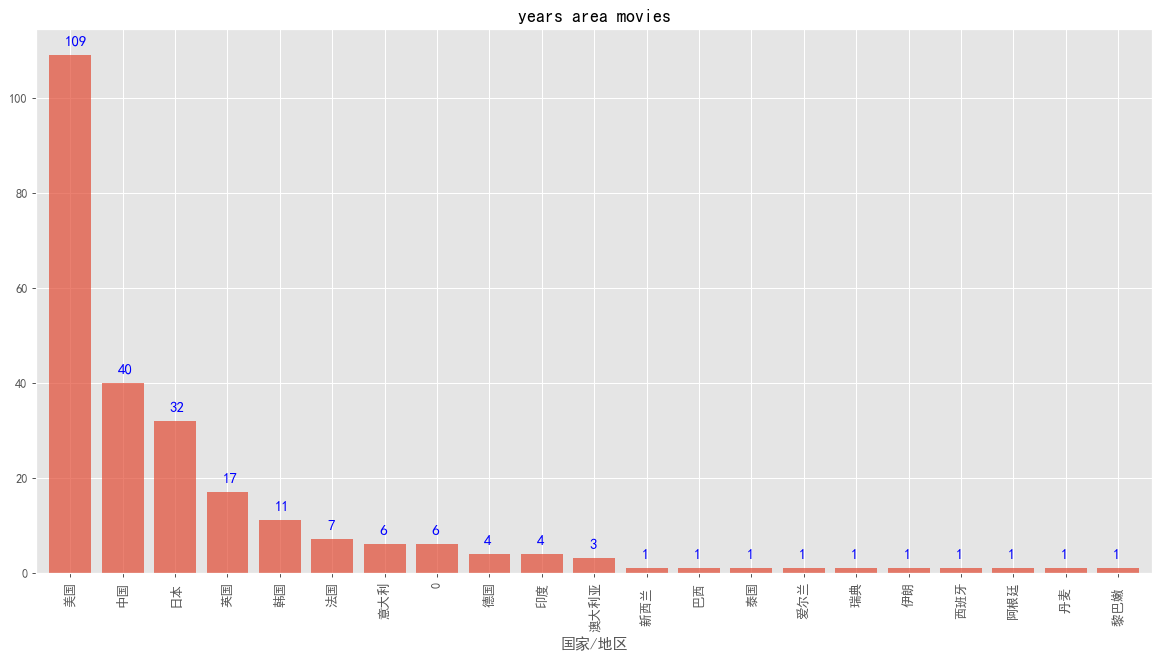

In [241]:
temp = df.groupby('国家/地区').size().sort_values(ascending=False)
ax = temp.plot.bar(figsize=(16,8), width=0.8, alpha=0.7, title='years area movies')

for x, y in zip(range(temp.size), temp):
    ax.text(x-0.1, y + 2, str(y), fontsize=12, color='b')

plt.show()

In [189]:
df.fillna(0, inplace=True)

df.pivot_table(index='国家/地区', values='评分',aggfunc='mean')

评分
国家/地区          
0      8.850000
中国     8.847500
丹麦     9.100000
伊朗     9.200000
印度     8.875000
巴西     9.000000
德国     8.875000
意大利    9.050000
新西兰    9.000000
日本     8.653125
法国     9.028571
泰国     8.400000
澳大利亚   8.733333
爱尔兰    8.800000
瑞典     8.900000
美国     8.674312
英国     8.823529
西班牙    8.800000
阿根廷    8.800000
韩国     8.945455
黎巴嫩    9.100000

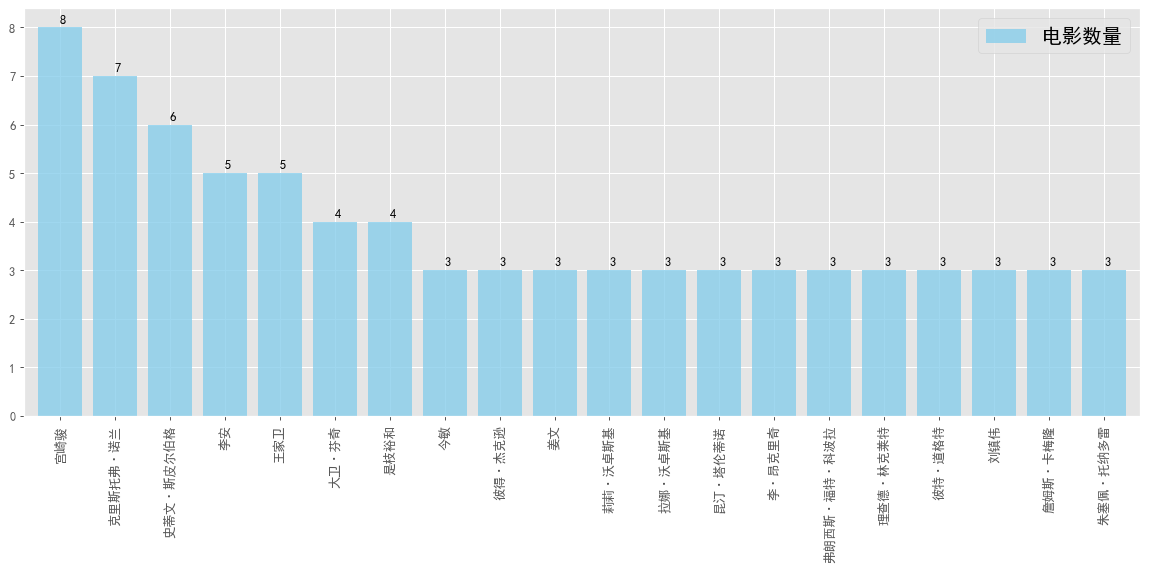

In [240]:
plt.rcParams["figure.dpi"] = 90

dd = {}
for k, v in df.iterrows():
    ds = [x.strip() for x in v.导演.split('/')]
    for d in ds:
        if d in dd:
            dd[d] += 1
        else:
            dd[d] = 1

temp = pd.DataFrame({'dirictor': dd.keys(), 'num': dd.values()})
ptemp = temp.sort_values('num', ascending=False)[:20]

ax = ptemp.plot.bar(figsize=(16,6),width=0.8, alpha= 0.8,color='skyblue')
ax.set_xticklabels(ptemp.dirictor, fontsize=10)
ax.legend(['电影数量'], fontsize=16)

for x, y in zip(range(ptemp.size), ptemp.num):
    ax.text(x, y+0.1, str(y))

plt.show()

In [208]:
ptemp


dirictor  num
6            宫崎骏    8
8       克里斯托弗·诺兰    7
7      史蒂文·斯皮尔伯格    6
42            李安    5
77           王家卫    5
52         大卫·芬奇    4
95          是枝裕和    4
100           今敏    3
37        彼得·杰克逊    3
44            姜文    3
55       莉莉·沃卓斯基    3
56       拉娜·沃卓斯基    3
72       昆汀·塔伦蒂诺    3
29        李·昂克里奇    3
22   弗朗西斯·福特·科波拉    3
104     理查德·林克莱特    3
39        彼特·道格特    3
15           刘镇伟    3
4        詹姆斯·卡梅隆    3
11      朱塞佩·托纳多雷    3

In [187]:
df

片名  上映年份   评分       评价人数        导演  \
0      肖申克的救赎  1994  9.7  2317937.0  弗兰克·德拉邦特   
1        霸王别姬  1993  9.6  1720638.0       陈凯歌   
2        阿甘正传  1994  9.5  1743966.0  罗伯特·泽米吉斯   
3     这个杀手不太冷  1994  9.4  1922740.0     吕克·贝松   
4       泰坦尼克号  1997  9.4  1706127.0   詹姆斯·卡梅隆   
..        ...   ...  ...        ...       ...   
257        浪潮  2008  8.7   223511.0   丹尼斯·甘塞尔   
258  小萝莉的猴神大叔  2015  8.4   404886.0     卡比尔·汗   
259        追随  1998  8.9   149521.0  克里斯托弗·诺兰   
260      网络谜踪  2018  8.6   430811.0   阿尼什·查甘蒂   
261      黑鹰坠落  2001  8.7   239402.0   雷德利·斯科特   

                                               编剧  \
0                                弗兰克·德拉邦特 / 斯蒂芬·金   
1                                        芦苇 / 李碧华   
2                                艾瑞克·罗斯 / 温斯顿·格鲁姆   
3                                           吕克·贝松   
4                                         詹姆斯·卡梅隆   
..                                            ...   
257  丹尼斯·甘塞尔 / 彼得·图万斯 / 约翰尼·道金斯 / 罗恩·比恩巴赫 / 罗恩·琼斯   
258                            卡比尔·汗 / 维杰耶德拉·普拉萨德   
259                                      克里斯托弗·诺兰   
260                             阿尼什·查甘蒂 / 赛弗·奥哈尼安   
261                                  肯·诺兰 / 马克·鲍登   

                                                    主演                 类型  \
0    蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...            剧情 / 犯罪   
1    张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...       剧情 / 爱情 / 同性   
2    汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...            剧情 / 爱情   
3    让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...       剧情 / 动作 / 犯罪   
4    莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...       剧情 / 爱情 / 灾难   
..                                                 ...                ...   
257  于尔根·福格尔 / 弗雷德里克·劳 / 马克思·雷迈特 / 詹妮弗·乌尔里希 / 克里斯蒂安...            剧情 / 惊悚   
258  萨尔曼·汗 / 哈莎莉·马洛特拉 / 卡琳娜·卡普尔 / 纳瓦祖丁·席迪圭 / 欧姆·普瑞 ...       剧情 / 喜剧 / 动作   
259  杰里米·西奥伯德 / 亚历克斯·霍 / 露西·拉塞尔 / 约翰·诺兰 / 迪克·布拉德塞尔 ...       悬疑 / 惊悚 / 犯罪   
260  约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...  剧情 / 悬疑 / 惊悚 / 犯罪   
261  乔什·哈奈特 / 伊万·麦克格雷格 / 汤姆·塞兹摩尔 / 金·寇兹 / 艾文·布莱纳 / ...       动作 / 历史 / 战争   

    国家/地区     语言  时长(分钟)  主演人数  
0      美国     英语   142.0    25  
1      中国  汉语普通话   171.0    20  
2      美国     英语   142.0    41  
3      法国    英语    110.0    16  
4      美国    英语    194.0    44  
..    ...    ...     ...   ...  
257     0     德语   107.0    10  
258    印度   印地语    159.0    12  
259    英国     英语    69.0    19  
260    美国     英语   102.0    24  
261    美国    英语    144.0    11  

[249 rows x 12 columns]

In [239]:
list(map(lambda x: x.strip(), ['fdsa ',' fdsafd ',' fdsafdsa','fdsafdsaf     ']))


['fdsa', 'fdsafd', 'fdsafdsa', 'fdsafdsaf']